In [10]:
from pysb import *
from pysb.integrate import Solver
from pysb.simulator import ScipyOdeSimulator 
from pysb.simulator.base import Simulator, SimulationResult
import scipy
import scipy.integrate
import pylab as pl
import numpy as np
import sympy

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Gliaden Degrader 
### pySB Kinetic Model

1 mM (millimolar) = 602,214 molecules/fL (molecules per femtoliter)<br>
1 uM (micromolar) = 602 molecules/fL<br>
1 nM (nanomolar) = 0.6 molecules/fL<br>
E. coli volume = 1.1 fL





## Model Declaration

In [27]:
gKill = Model()

#Monomers

Monomer('gliadin', ['b', 'immunogenic'], {'immunogenic': ['yes','no']})
Monomer('cleavedGliadin', ['immunogenic'])
Monomer('kumamax', ['b'])

#Parameters

Parameter('pHsys', 4)
Parameter('k_f', 1e-03)
Parameter('k_r', 1e-05)
Parameter('k_cat', 0.00141718)
Parameter('k_tot', 0.00141718) #estimated from half-life equation
#Parameter('k_obs', 0.00328545) #@PQ

Parameter('init_cleavedG_conc', 0.000) #initial cleaved gliadin 
Parameter('init_G_conc', 0.001) #initial gliadin concentration = mol/L
Parameter('init_Kuma_Conc', 3.6e-06) #initial enzyme concentration 

#Rules

Rule('enzyme_binds_gliadin', gliadin(b=None, immunogenic='yes') + kumamax(b=None) >> gliadin(b=1, immunogenic='no') % kumamax(b=1), k_f)

Rule('enzyme_dissociates_gliadin', gliadin(b=1, immunogenic='no') % kumamax(b=1) >> gliadin(b=None, immunogenic='no') + kumamax(b=None), k_cat) 

Rule('gliadin_cleaves', gliadin(b=None, immunogenic='yes') >> cleavedGliadin(immunogenic='no'), k_tot)


Observable('obsImmunogenicGliadin', gliadin(b=None, immunogenic='yes'))
Observable('obsBoundGliadin', gliadin(b=1, immunogenic='no'))
Observable('obsDegradedGliadin', gliadin(b=None, immunogenic='no'))

#Boundary Conditions

Initial(gliadin(b=None, immunogenic='yes'), init_G_conc) #concentration - mol/L
Initial(kumamax(b=None), init_Kuma_Conc) #mol/L
Initial(cleavedGliadin(immunogenic='no'), init_cleavedG_conc)

Solver initialization

In [28]:
t = np.linspace(0, 6000, 5)
scipysim = ScipyOdeSimulator(gKill).run(tspan=t)
yout = scipysim.all


BngInterfaceError: a bytes-like object is required, not 'str'

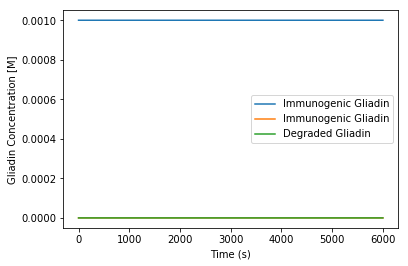

In [25]:
#plt.plot(t, scipysim[:, 0], label='Immunogenic Gliadin Concentration')

pl.ion()
pl.figure()
pl.plot(t, yout['obsImmunogenicGliadin'], label="Immunogenic Gliadin")
pl.plot(t, yout['obsBoundGliadin'], label="Immunogenic Gliadin")
pl.plot(t, yout['obsDegradedGliadin'], label="Degraded Gliadin")
pl.legend(loc=0)
pl.xlabel("Time (s)")
pl.ylabel("Gliadin Concentration [M]")
pl.show()

### Model Assumptions:
##### -1 active site on KumaMax


